# Please run ./generate_histograms first before running this notebook

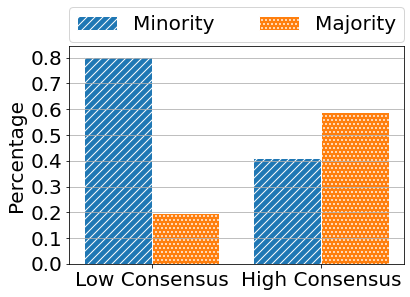

In [163]:
import matplotlib.pyplot as plt
import numpy as np

not_phd_raw = np.load('not_phd_0.npy')[0:112]
phd_raw = np.load('phd_0.npy')
for i in range(1, 250):
    not_phd_raw += np.load('not_phd_'+str(i)+'.npy')[0:112]
    phd_raw += np.load('phd_'+str(i)+'.npy')

not_phd=[a[0]-a[1] for a in not_phd_raw]
phd=[a[0]-a[1] for a in phd_raw]
def cal_freq(diffs):
    length = len(range(-250, 251))
    counts = np.zeros(length)
    for i in diffs:
        i = int(i)
        counts[i-250] = counts[i-250] + 1
    return counts
new_freq_p = cal_freq(phd)
new_freq_n = cal_freq(not_phd)

h=[0,0]
l=[0,0]


for i in range(len(new_freq_p)):
    if 125 <= i <= 375:
        l[0]+=new_freq_p[i]
        l[1]+=new_freq_n[i]
    else:
        h[0]+=new_freq_p[i]
        h[1]+=new_freq_n[i]

h = np.array(h)
h = h/np.sum(h)
l = np.array(l)
l = l/np.sum(l)
m=[l[0], h[0]]
n=[l[1], h[1]]

ind = np.array(np.arange(0, 1, 0.5))  # the x locations for the groups
width = 0.2
fig, ax = plt.subplots()
plt.grid(axis='y')
rects1 = ax.bar(ind, m, width, hatch='///', label='Minority',edgecolor ='white')
rects2 = ax.bar(ind + width, n, width, hatch='...',  label='Majority',edgecolor ='white')

plt.ylabel('Percentage', fontsize = 20)
lgd=plt.legend(fontsize = 20, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Low Consensus', 'High Consensus'), fontsize = 20)
plt.savefig("phd.pdf", format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
# ax.legend((rects1[0], rects2[0]), ('Minority', 'Majority'))
plt.show()